In [1]:
options(repr.plot.width=6, repr.plot.height=4.5, jupyter.plot_mimetypes='image/svg+xml')

In [2]:
source('common.r')

In [7]:
d <- data.or.csv(
    csv = 'data/owl.csv',
    gen = function() data.owl()
)

In [8]:
subset(d, duration == 60 & blockade == 'slow', select=c('c_reqs','ipa_consistency','op_rate'))

,c_reqs,ipa_consistency,op_rate
8,16,NA,593.1705
9,128,NA,2459.901
10,512,NA,4131.213
11,2048,NA,4663.397
12,8192,NA,4658.525
18,16,strong,595.6613
19,128,strong,2490.485
20,512,strong,4183.781
21,2048,strong,4574.929
22,16,weak,1813.188


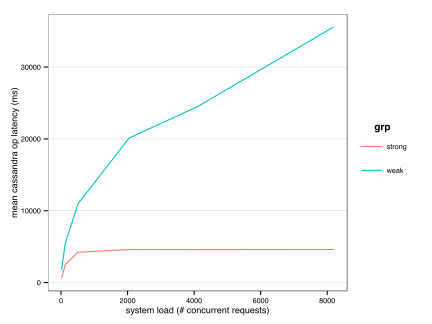

In [12]:
d$x <- d$c_reqs
d$grp <- d$ipa_consistency
s <- subset(d, duration == 60 & blockade == 'slow' & !is.na(ipa_consistency))

ggplot(s, aes(x=x, y=op_rate, color=grp, fill=grp, group=grp))+
    stat_summary(geom='line', fun.y=mean)+
    xlab('system load (# concurrent requests)')+
    ylab('mean cassandra op latency (ms)')+
    my_theme()

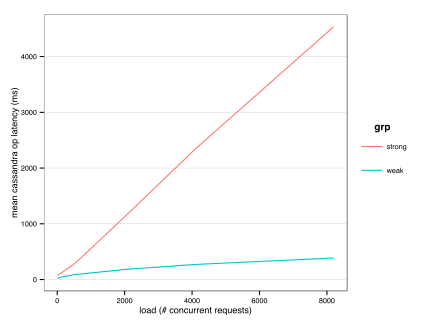

In [11]:
ggplot(s, aes(x=x, y=op_lat_mean, color=grp, fill=grp, group=grp))+
    stat_summary(geom='line', fun.y=mean)+
    xlab('system load (# concurrent requests)')+
    ylab('mean cassandra op latency (ms)')+
    my_theme()